##Lecture 10 Take-home Exercises.  Discussion is allowed. 
Due: March 3, 2021.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import imageio
import sys
import cv2 as cv

Exericse 0 Basic Image FFT. 

In [12]:
random_img = np.random.random((256,256))
Z = np.random.random((256,256))   # Test data

In [17]:
# compute the FFT, finish the code below 
f = np.fft.fft2(random_img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))
print(magnitude_spectrum)

[[158.06103838 120.71450044 128.03127546 ... 105.09796552 128.03127546
  120.71450044]
 [ 99.72568585 114.64864649 144.00695431 ...  86.96835301 122.93635019
  131.7685614 ]
 [148.3475638  110.4590896   63.87621588 ...  96.31759677 102.35078974
  119.50016743]
 ...
 [119.99196639 134.90112297 110.62181968 ... 130.39632722  99.90791391
  124.94174249]
 [148.3475638  119.50016743 102.35078974 ... 129.39767252  63.87621588
  110.4590896 ]
 [ 99.72568585 131.7685614  122.93635019 ... 123.64653027 144.00695431
  114.64864649]]


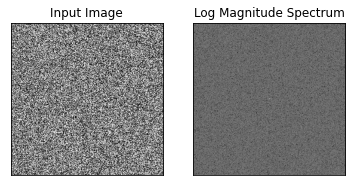

In [18]:
# display the original image and FFT
plt.subplot(121),plt.imshow(random_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Log Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [23]:
# diagonal image
diag_img = 100*np.identity(255)

#To do compute the FFT
f = np.fft.fft2(diag_img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


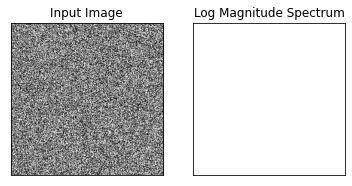

In [24]:
# display the original image and FFT
plt.subplot(121),plt.imshow(random_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Log Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Exercise 1 Can you manipulate the fourier spectrum and remiove low-frequenty of the image. Can you modify it to remove high frequnecy? 

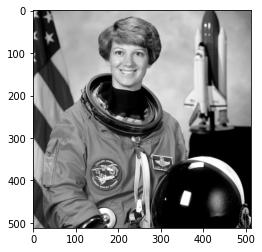

In [7]:
img = imageio.imread('imageio:astronaut.png',as_gray=True)
plt.figure()
plt.imshow(img, cmap='gray')

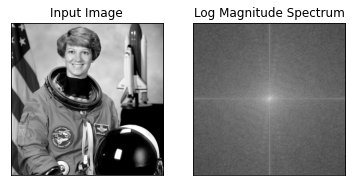

In [8]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Log Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [29]:
# To do. How do you remove the low frequencies Display the DFT magnitutde and the resulting image here

# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
row, cols = imBlur.shape
crow, ccol = round(rows/2), round(cols/2)
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

NameError: ignored

In [ ]:
# To do. how do you remove the high frequency?  Display the DFT magnitutde and the resulting image here

## Exercise 2. Swich Phase and Magnitude.  read in the Cheetha and Zebra image. 
DFT both iuamges in Fourier domain and compute magnitude and phase.  
YOu can compute phase and magnitude as this:
magnitude_zebra = 30*np.log(np.abs(fshit)
phase_zabera = np.angle(fshift)

In [ ]:
# Todo  read in cheeta and zebra images
# FFT cheeta image 
# compute magnitude
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# compute magnitude
magnitude_cheetah = 30*np.log(np.abs(fshift))
# compute phase
phase_cheetah = np.angle(fshift)
# Todo: repeat above with Zebra 
# Todo: Display the original image and the DFT components
# Todo: Please reconstruct the images, please switch phase of zebra and cheeta, and display the final image here

# Exercise 3: Simple Image De-nosing 
 Read in the provided image moonlanding.png, which is heavily contaiinated with periorid noise. In this exercise, we aim to clean up the noise using FFT. 
 1. load the image with your favourite lib.
 2. Use the 2DFFT in numpy.fft and plot the spectrum
 3. The specdtrum consists of high and low frequency components. The noise is contained in the high frequency part of the spectrum. So set some of those components to zero. 
 4. Apply the inverse FFT to see the resulting image.

## Exercise 4: Filtering in FFT.  Build a Gaussian filter. Then show you can FFT the filter and the signal, multiply them togheter to low-pass the original image.


NameError: ignored

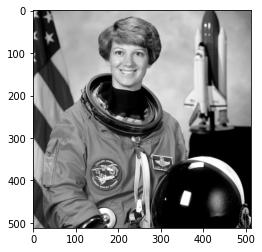

In [ ]:
img = imageio.imread('imageio:astronaut.png',as_gray=True)
plt.figure()
plt.imshow(img, cmap='gray')
# image size, square side length, number of squares
ncols, nrows = img.shape


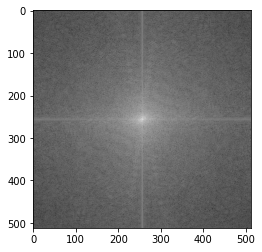

In [ ]:
# FFT the original image
ftimage = np.fft.fft2(img)
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.log(np.abs(ftimage)),cmap='gray')
plt.show()

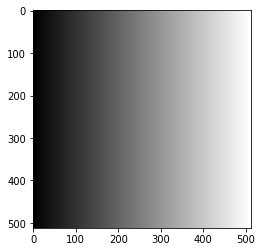

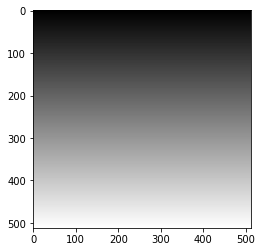

In [ ]:
# Build and apply a Gaussian filter and make sure the size is correct
sigmax, sigmay = 30, 30
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
plt.imshow(X,cmap='gray')
plt.show()

plt.imshow(Y,cmap='gray')
plt.show()

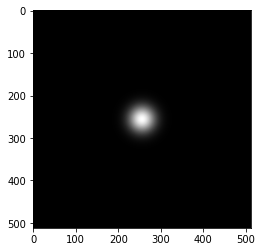

In [ ]:
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))


plt.imshow(gmask,cmap='gray')
plt.show()

In [ ]:
# TODO: filtering in Fourier Domain
# TDDo : # Finally, take the inverse transform and show the blurred image

## Exercise 5, how do you highpass filter the image in FFT domain?
## step one: create a high pass filter in FD and then perform convolution in FD?
# Hint: many ways to create high pass filter 1) sobel, 2) subtract from low-pass
# 3) or something like this: 
#kernel = np.array([[-1, -1, -1],
 #                  [-1,  8, -1],
  #                 [-1, -1, -1]])

In [ ]:
# TOdo: use the above image example, finish the high-passing 